# MNIST_classification

A PyTorch implementation of the MNIST digit classification task using a neural network. The model is trained to recognise handwritten digits from the MNIST dataset, leveraging PyTorch's built-in functions for data loading, model building, and training.

# Section 0: Import Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Check if CUDA is available (for GPU acceleration)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use "cuda" if available, otherwise fallback to "cpu"
print('Device:', device)

Device: cuda


# Section 1: Load Data

In [3]:
transform = transforms.Compose([transforms.ToTensor()])         # Define any data transformations (e.g., ToTensor, Normalize, etc.)
train_dataset = datasets.MNIST(root = '/kaggle/working/', train = True, download=True, transform=transform)     # Load the training dataset with the defined transform
test_dataset = datasets.MNIST(root = '/kaggle/working/', train = False, download=True, transform=transform)      # Load the test dataset with the defined transform

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 13.1MB/s]


Extracting /kaggle/working/MNIST/raw/train-images-idx3-ubyte.gz to /kaggle/working/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 342kB/s]


Extracting /kaggle/working/MNIST/raw/train-labels-idx1-ubyte.gz to /kaggle/working/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.23MB/s]


Extracting /kaggle/working/MNIST/raw/t10k-images-idx3-ubyte.gz to /kaggle/working/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.08MB/s]

Extracting /kaggle/working/MNIST/raw/t10k-labels-idx1-ubyte.gz to /kaggle/working/MNIST/raw



torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
<class 'int'>
0 255
torch.Size([60000])
5


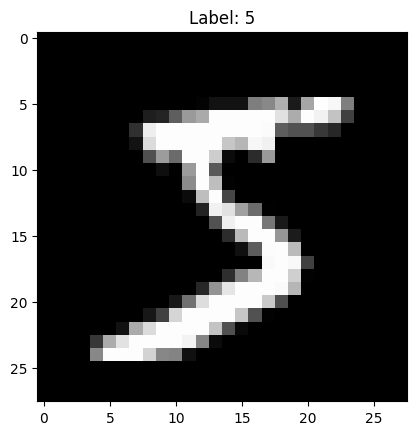

In [4]:
print(train_dataset.data.shape)                   # Print shape of training data
print(test_dataset.data.shape)                    # Print shape of test data
print(type(train_dataset.data[0,0,0].item()))     # Print data type of a pixel
print(train_dataset.data.min().item(), train_dataset.data.max().item())  # Print min and max pixel values
print(train_dataset.targets.shape)                # Print shape of labels
print(train_dataset.targets[0].item())            # Print the first label

# Display the first training image
plt.imshow(train_dataset.data[0], cmap='gray')
plt.title(f'Label: {train_dataset.targets[0].item()}')
plt.show()

# Section 2: Preprocessing

0.0 1.0
5


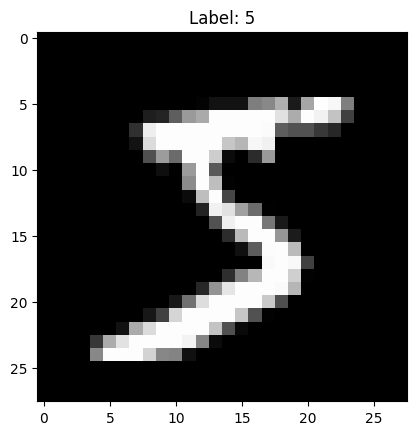

In [5]:
train_dataset.data = train_dataset.data.float()/255.0  # Normalize training data by dividing by 255.0
test_dataset.data = test_dataset.data.float()/255.0   # Normalize test data by dividing by 255.0

print(train_dataset.data.min().item(), train_dataset.data.max().item())  # Print min and max pixel values
print(train_dataset.targets[0].item())  # Print the first label

# Display the first image in the training dataset
plt.imshow(train_dataset.data[0], cmap='gray')
plt.title(f'Label: {train_dataset.targets[0].item()}')
plt.show()

# Section 3: Define Hyperparameters

In [6]:
batch_size = 32
epochs = 25
learning_rate = 0.001

# Section 4: Define the Network

In [7]:
class MNISTModel(nn.Module):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.flatten = nn.Flatten() # Flatten the input image (e.g., from 28x28 to 784)
        self.fc1 = nn.Linear(28*28, 100)      # First fully connected layer (input: 784, output: 100)
        self.fc2 = nn.Linear(100, 200)      # Second fully connected layer (input: 100, output: 200)
        self.fc3 = nn.Linear(200, 10)      # Output layer (input: 200, output: 10 for classification)

    def forward(self, x):
        x = self.flatten(x)  # Flatten the input
        x = torch.sigmoid(self.fc1(x))  # Apply sigmoid to output of fc1
        x = torch.sigmoid(self.fc2(x))  # Apply sigmoid to output of fc2
        x = self.fc3(x) # Pass through final layer without activation
        return x

model = MNISTModel()
model = model.to("cuda") # Instantiate the model and move it to the selected device
print(model)

criterion = nn.CrossEntropyLoss()  # Define loss function (e.g., CrossEntropyLoss)
optimizer = optim.Adam(model.parameters(), lr = learning_rate)  # Define optimizer (e.g., Adam with model parameters and learning rate)


MNISTModel(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=10, bias=True)
)


# Section 5: Train the Network

In [8]:
# Section 5: Train the Network
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)  # Create DataLoader for training data with batch_size and shuffle=True
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)   # Create DataLoader for test data with batch_size and shuffle=False

for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to("cuda"), labels.to("cuda")
        # Move images and labels to the device (CPU or GPU)
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass through the model
        outputs = model(images)
        
        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        
        # Optimizer step
        optimizer.step()
        
        # Accumulate loss into running_loss
        running_loss += loss.item()
   
    # Print average loss for the epoch
    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}')

Epoch 1/25, Loss: 1.4510
Epoch 2/25, Loss: 1.2042
Epoch 3/25, Loss: 1.1553
Epoch 4/25, Loss: 1.1264
Epoch 5/25, Loss: 1.1085
Epoch 6/25, Loss: 1.0949
Epoch 7/25, Loss: 1.0851
Epoch 8/25, Loss: 1.0763
Epoch 9/25, Loss: 1.0684
Epoch 10/25, Loss: 1.0619
Epoch 11/25, Loss: 1.0551
Epoch 12/25, Loss: 1.0518
Epoch 13/25, Loss: 1.0455
Epoch 14/25, Loss: 1.0405
Epoch 15/25, Loss: 1.0376
Epoch 16/25, Loss: 1.0329
Epoch 17/25, Loss: 1.0293
Epoch 18/25, Loss: 1.0253
Epoch 19/25, Loss: 1.0218
Epoch 20/25, Loss: 1.0177
Epoch 21/25, Loss: 1.0147
Epoch 22/25, Loss: 1.0113
Epoch 23/25, Loss: 1.0082
Epoch 24/25, Loss: 1.0060
Epoch 25/25, Loss: 1.0021


# Section 6: Perform Inference

In [9]:
# Section 6: Perform Inference
model.eval()  # Set the model to evaluation mode
predictions = []

with torch.no_grad():
    for images, _ in test_loader:
        images = images.to("cuda") # Move images to the device
        # Perform a forward pass through the model
        outputs = model(images)
        
        # Get the predicted class labels (e.g., using torch.max)
        _, predicted = torch.max(outputs, 1)
        
        # Append predictions to the predictions list
        predictions.extend(predicted.cpu().numpy())

# Section 7: Output

Predicted digit: 7


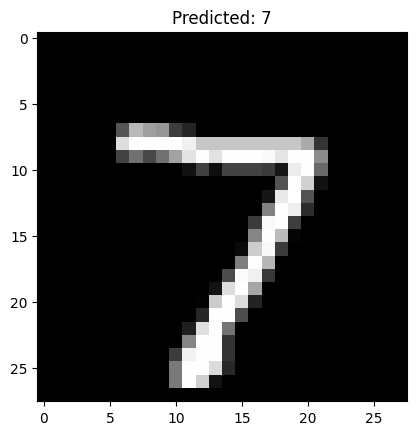

In [10]:
index = 0  # Choose an index to visualize

# Print the predicted digit at the chosen index
print(f'Predicted digit: {predictions[index]}')

# Display the corresponding image from the test dataset
plt.imshow(test_dataset.data[index], cmap='gray')
plt.title(f'Predicted: {predictions[index]}')
plt.show()